<a href="https://colab.research.google.com/github/karoline-juliana/posgrad_cienciadados/blob/main/Projeto_Serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P√≥s-Gradua√ß√£o em Especializa√ß√£o em Ci√™ncia de Dados


---------------------------------------------------------------
**Universidade Federal de Pernambuco - UFPE**

**Curso de P√≥s-Gradua√ß√£o em Ci√™ncia de Dados**

**Disciplina: PROGRAMA√á√ÉO PARA APRENDIZAGEM DE M√ÅQUINA**

**Discentes: Karoline J. Costa da Silva e Xadai Rud√°**

**Docente: Prof. Dr. Cleber Zanchettin**

---------------------------------------------------------------

## Projeto da Disciplina

O projeto escolhido foi o **Store Sales - Time Series Forecasting**, cujo objetivo ser√° prever as vendas para as milhares de fam√≠lias de produtos vendidas nas lojas Favorita localizadas no Equador. 

Os dados de treinamento incluem datas, informa√ß√µes da loja e do produto, se esse item estava sendo promovido, bem como os n√∫meros de vendas. 

Arquivos adicionais incluem informa√ß√µes suplementares que podem ser √∫teis na constru√ß√£o de seus modelos.

O dataset pode ser visualizado nesse [link](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data). 

## Descri√ß√µes dos arquivos e informa√ß√µes de campo dos dados

**```train.csv```**
* Os dados de treinamento, incluindo s√©ries temporais de recursos **store_nbr**, **family** e **onpromotion**, bem como as vendas-alvo.
* **store_nbr** identifica a loja na qual os produtos s√£o vendidos.
* **family** identifica o tipo de produto vendido.
* **sales** fornece o total de vendas de uma fam√≠lia de produtos em uma determinada loja em uma determinada data. Valores fracion√°rios s√£o poss√≠veis, pois os produtos podem ser vendidos em unidades fracionadas (1,5 kg de queijo, por exemplo, em vez de 1 saco de batatas fritas).
* **onpromotion** fornece o n√∫mero total de itens em uma fam√≠lia de produtos que estavam sendo promovidos em uma loja em uma determinada data.

**```test.csv```**
* Os dados de teste, com os mesmos recursos que os dados de treinamento. Iremos prever as vendas alvo para as datas neste arquivo.
* As datas nos dados de teste s√£o para os 15 dias ap√≥s a √∫ltima data nos dados de treinamento.

**```sample_submission.csv```**
* Um arquivo de envio de amostra no formato correto.

**```stores.csv```**
* armazena metadados, incluindo **city**, **state**, **type** e **cluster**.
* **cluster** √© um agrupamento de lojas semelhantes.

**```oil.csv```**
* Pre√ßo di√°rio do petr√≥leo. Inclui valores durante os prazos de dados de treinamento e teste. (O Equador √© um pa√≠s dependente do petr√≥leo e sua sa√∫de econ√¥mica √© altamente vulner√°vel a choques nos pre√ßos do petr√≥leo.)

**```holidays_events.csv```**
* Feriados e Eventos, com metadados
* NOTA: Aten√ß√£o especial √† coluna **transferred**. Um feriado que √© transferido oficialmente cai nesse dia do calend√°rio, mas foi transferido para outra data pelo governo. Um dia transferido √© mais como um dia normal do que um feriado. Para encontrar o dia em que realmente foi comemorado, procure a linha correspondente onde type √© Transfer. Por exemplo, o feriado Independ√™ncia de Guayaquil foi transferido de 2012-10-09 para 2012-10-12, o que significa que foi comemorado em 2012-10-12. Os dias do tipo Bridge s√£o dias extras adicionados a um feriado (por exemplo, para estender o intervalo em um fim de semana prolongado). Estes s√£o frequentemente compostos pelo tipo Dia de Trabalho, que √© um dia normalmente n√£o agendado para o trabalho (por exemplo, s√°bado) que visa o retorno da Ponte.
* Feriados adicionais s√£o dias adicionados a um feriado regular do calend√°rio, por exemplo, como normalmente acontece em torno do Natal (tornando a v√©spera de Natal um feriado).

**Notas Adicionais**
* Os sal√°rios no setor p√∫blico s√£o pagos quinzenalmente no dia 15 e no √∫ltimo dia do m√™s. As vendas nos supermercados podem ser afetadas por isso.
* Um terremoto de magnitude 7,8 atingiu o Equador em 16 de abril de 2016. Pessoas se reuniram em esfor√ßos de ajuda doando √°gua e outros produtos de primeira necessidade que afetaram muito as vendas dos supermercados por v√°rias semanas ap√≥s o terremoto.

# Importando os dados

Importamos as bibliotecas que ser√£o utilizadas para o projeto.

In [ ]:
import pandas as pd
import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from learntools.time_series.style import *

from pathlib import Path
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go


Em seguida, fazemos o download dos datasets que foram utilizados.

In [ ]:
holiday_events = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/oil.csv')
stores = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/stores.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/sample_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/test.csv')
train = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/train.csv')
transactions = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/transactions.csv')

In [ ]:
print(holiday_events.info())
print(oil.info())
print(stores.info())
print(sample_submission.info())
print(test.info())
print(train.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   

# Tratamento dos dados.

Optamos por concatenar todos os datasets para auxiliar na manipula√ß√£o dos dados.

In [ ]:
df_data = pd.concat([train, test], sort = True)
df_data = df_data.merge(stores, how = 'left', on = 'store_nbr')
df_data = df_data.merge(oil, how = 'left', on = 'date')
df_data = df_data.merge(transactions, how = 'left', on = ['date', 'store_nbr'])
df_data = df_data.merge(holiday_events, how = 'left', on = 'date')
df_data = df_data.rename(columns={'type_x': 'store', 'type_y': 'holiday'})
df_data['date'] = pd.to_datetime(df_data['date'])

df_data['year'] = df_data['date'].dt.year
df_data['month'] = df_data['date'].dt.month
df_data['week'] = df_data['date'].dt.isocalendar().week
df_data['quarter'] = df_data['date'].dt.quarter
df_data['day_of_week'] = df_data['date'].dt.day_name()
#df_data.set_index('date', inplace=True)
df_data.head()

date      family  id  onpromotion  sales  store_nbr   city      state  \
0 2013-01-01  AUTOMOTIVE   0            0    0.0          1  Quito  Pichincha   
1 2013-01-01   BABY CARE   1            0    0.0          1  Quito  Pichincha   
2 2013-01-01      BEAUTY   2            0    0.0          1  Quito  Pichincha   
3 2013-01-01   BEVERAGES   3            0    0.0          1  Quito  Pichincha   
4 2013-01-01       BOOKS   4            0    0.0          1  Quito  Pichincha   

  store  cluster  ...  holiday    locale locale_name         description  \
0     D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
1     D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
2     D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
3     D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
4     D       13  ...  Holiday  National     Ecuador  Primer dia del ano   

  transferred  year month  week  quarter  day_of_week  
0       False  2013     1     1        1      Tuesday  
1       False  2013     1     1        1      Tuesday  
2       False  2013     1     1        1      Tuesday  
3       False  2013     1     1        1      Tuesday  
4       False  2013     1     1        1      Tuesday  

[5 rows x 22 columns]

Visualiza√ß√£o das informa√ß√µes gerais sobre os atributos.

In [ ]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   family        object        
 2   id            int64         
 3   onpromotion   int64         
 4   sales         float64       
 5   store_nbr     int64         
 6   city          object        
 7   state         object        
 8   store         object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  transactions  float64       
 12  holiday       object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
 17  year          int64         
 18  month         int64         
 19  week          UInt32        
 20  quarter       int64         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int64(7), object(10)


## Corrigindo os valores nulos.

In [ ]:
moving_average_oil = oil.rolling(
    window=365,       
    center=True,      
    min_periods=183,  
).median()              
moving_average_oil['date'] = oil['date']
moving_average_oil.loc[[0,1],'dcoilwtico'] = moving_average_oil.loc[2,'dcoilwtico']
moving_average_oil.date = pd.to_datetime(moving_average_oil.date)
df_yr_oil = oil[['date','dcoilwtico']]

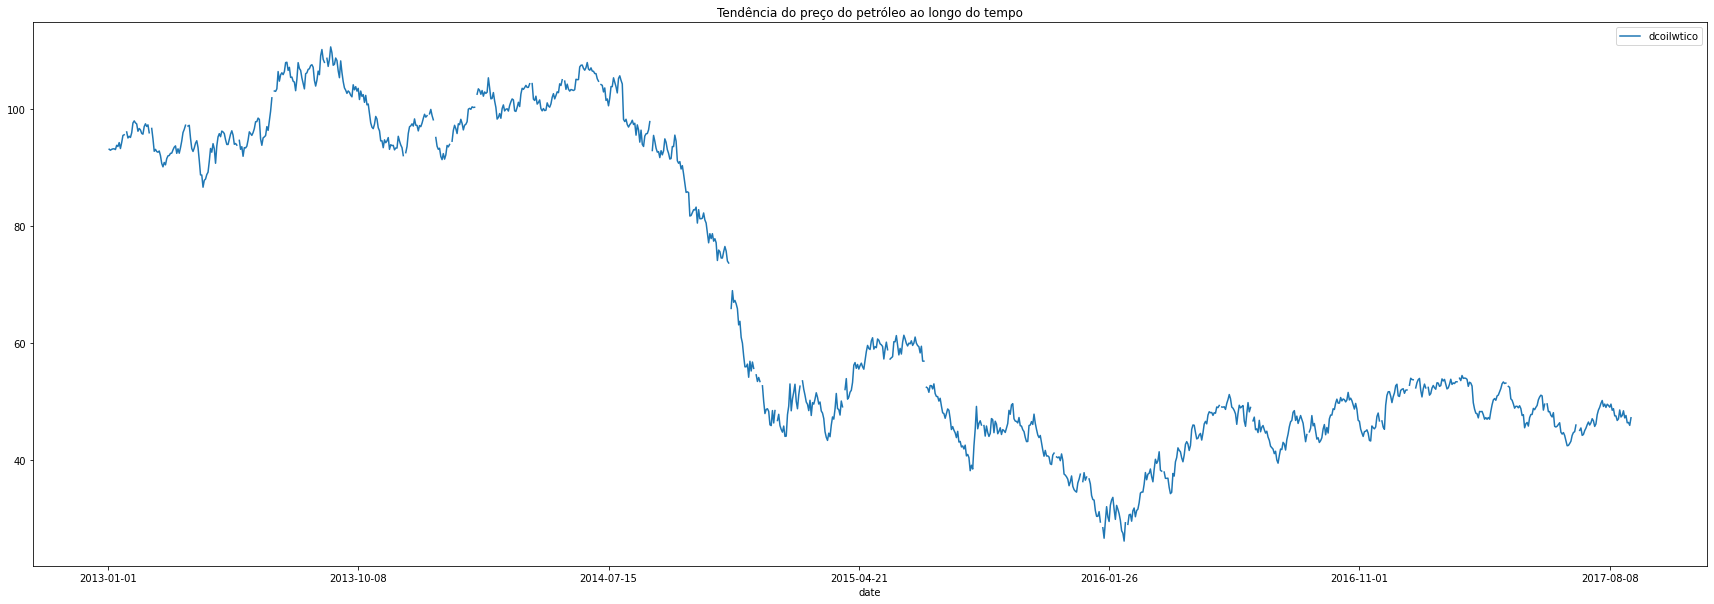

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (30,10))
df_yr_oil.plot.line(x="date",y="dcoilwtico", title = "Tend√™ncia do pre√ßo do petr√≥leo ao longo do tempo", ax = axes)
plt.show();

In [ ]:
df_data['dcoilwtico'] = df_data['dcoilwtico'].fillna(method='bfill')
df_data.dcoilwtico.isnull().sum()

0

In [ ]:
df_data.transactions = df_data.transactions.replace(np.nan,0)

In [ ]:
df_data[['locale', 'locale_name', 'description']] = df_data[['locale', 'locale_name', 'description']].replace(np.nan,'')
df_data.holiday = df_data.holiday.replace(np.nan,'Working Day')
df_data.transferred = df_data.transferred.replace(np.nan,False)

In [ ]:
df_data

date                      family       id  onpromotion  sales  \
0       2013-01-01                  AUTOMOTIVE        0            0    0.0   
1       2013-01-01                   BABY CARE        1            0    0.0   
2       2013-01-01                      BEAUTY        2            0    0.0   
3       2013-01-01                   BEVERAGES        3            0    0.0   
4       2013-01-01                       BOOKS        4            0    0.0   
...            ...                         ...      ...          ...    ...   
3082855 2017-08-31                     POULTRY  3029395            1    NaN   
3082856 2017-08-31              PREPARED FOODS  3029396            0    NaN   
3082857 2017-08-31                     PRODUCE  3029397            1    NaN   
3082858 2017-08-31  SCHOOL AND OFFICE SUPPLIES  3029398            9    NaN   
3082859 2017-08-31                     SEAFOOD  3029399            0    NaN   

         store_nbr   city      state store  cluster  ...      holiday  \
0                1  Quito  Pichincha     D       13  ...      Holiday   
1                1  Quito  Pichincha     D       13  ...      Holiday   
2                1  Quito  Pichincha     D       13  ...      Holiday   
3                1  Quito  Pichincha     D       13  ...      Holiday   
4                1  Quito  Pichincha     D       13  ...      Holiday   
...            ...    ...        ...   ...      ...  ...          ...   
3082855          9  Quito  Pichincha     B        6  ...  Working Day   
3082856          9  Quito  Pichincha     B        6  ...  Working Day   
3082857          9  Quito  Pichincha     B        6  ...  Working Day   
3082858          9  Quito  Pichincha     B        6  ...  Working Day   
3082859          9  Quito  Pichincha     B        6  ...  Working Day   

           locale locale_name         description transferred  year  month  \
0        National     Ecuador  Primer dia del ano       False  2013      1   
1        National     Ecuador  Primer dia del ano       False  2013      1   
2        National     Ecuador  Primer dia del ano       False  2013      1   
3        National     Ecuador  Primer dia del ano       False  2013      1   
4        National     Ecuador  Primer dia del ano       False  2013      1   
...           ...         ...                 ...         ...   ...    ...   
3082855                                                 False  2017      8   
3082856                                                 False  2017      8   
3082857                                                 False  2017      8   
3082858                                                 False  2017      8   
3082859                                                 False  2017      8   

         week  quarter  day_of_week  
0           1        1      Tuesday  
1           1        1      Tuesday  
2           1        1      Tuesday  
3           1        1      Tuesday  
4           1        1      Tuesday  
...       ...      ...          ...  
3082855    35        3     Thursday  
3082856    35        3     Thursday  
3082857    35        3     Thursday  
3082858    35        3     Thursday  
3082859    35        3     Thursday  

[3082860 rows x 22 columns]

# EDA - An√°lise Explorat√≥ria de Dados

### An√°lise m√©dia das vendas

In [ ]:
# data
# Agrupamos por tipo de loja, e adicionamos ao DataFrame um √∫nico campo 'vendas' com a m√©dia dos pre√ßos de venda ordenados de forma crescente
df_st_sa = df_data[:train.shape[0]].groupby('store').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_fa_sa = df_data[:train.shape[0]].groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_cl_sa = df_data[:train.shape[0]].groupby('cluster').agg({"sales" : "mean"}).reset_index() 

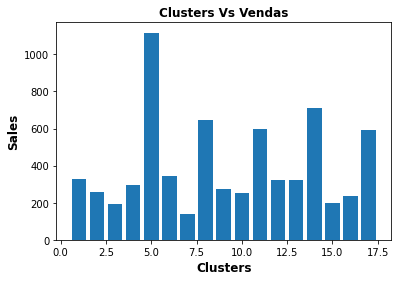

In [ ]:
plt.bar(df_cl_sa.cluster, df_cl_sa.sales)
plt.title('Clusters Vs Vendas', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')
plt.xlabel('Clusters', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.show();

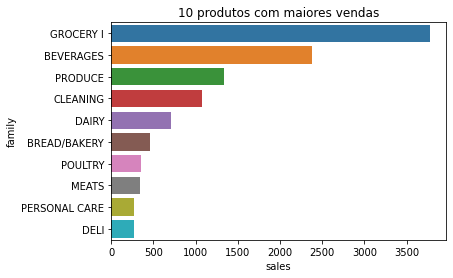

In [ ]:
sns.barplot(x = df_fa_sa.sales, y = df_fa_sa.family, data = df_fa_sa).set_title("10 produtos com maiores vendas");

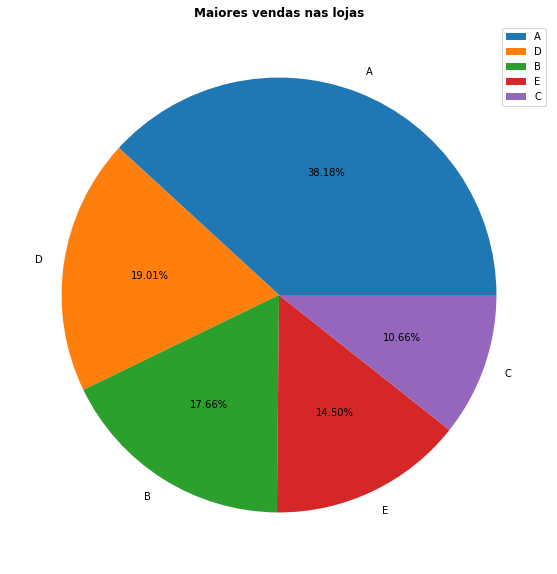

In [ ]:
plt.figure(figsize = (20,10))
plt.pie(df_st_sa.sales, labels = df_st_sa.store, autopct='%1.2f%%')
plt.legend()
plt.title('Maiores vendas nas lojas', fontsize=12, fontweight='bold')
plt.show();

As vendas mais altas s√£o feitas por produtos como **mercearia** e **bebidas**. A **loja A** tem as vendas mais altas, com **38%**.

In [ ]:
# data 
df_2013 = df_data[df_data['year']==2013][:train.shape[0]][['month','sales']]
df_2013 = df_2013.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s13'})
df_2014 = df_data[df_data['year']==2014][:train.shape[0]][['month','sales']]
df_2014 = df_2014.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s14'})
df_2015 = df_data[df_data['year']==2015][:train.shape[0]][['month','sales']]
df_2015 = df_2015.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s15'})
df_2016 = df_data[df_data['year']==2016][:train.shape[0]][['month','sales']]
df_2016 = df_2016.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s16'})
df_2017 = df_data[df_data['year']==2017][:train.shape[0]][['month','sales']]
df_2017 = df_2017.groupby('month').agg({"sales" : "mean"}).reset_index()
df_2017_no = pd.DataFrame({'month': [9,10,11,12], 'sales':[0,0,0,0]})
df_2017 = df_2017.append(df_2017_no).rename(columns={'sales':'s17'})
df_year = df_2013.merge(df_2014,on='month').merge(df_2015,on='month').merge(df_2016,on='month').merge(df_2017,on='month')

# Valor do eixo X 
df_year = df_year[['s13','s14','s15','s16','s17']].replace(np.nan,0)
x_data = df_year.values

# valor do eixo y (m√™s)
df_2013['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2013['month'].tolist()


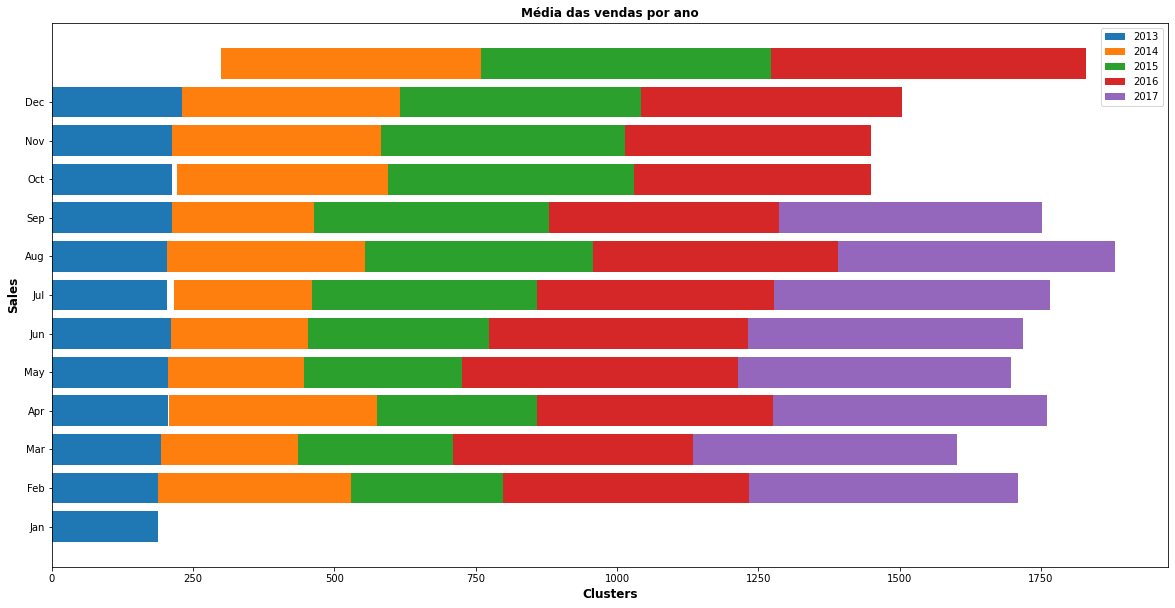

In [ ]:
plt.figure(figsize = (20,10))

plt.barh(df_2013.month, df_2013.s13, data = df_2013)
plt.barh(df_2014.month, df_2014.s14, left = df_2013.s13, data = df_2014)
plt.barh(df_2015.month, df_2015.s15, left = df_2013.s13 + df_2014.s14, data = df_2015)
plt.barh(df_2016.month, df_2016.s16, left = df_2013.s13 + df_2014.s14 + df_2015.s15, data = df_2016)
plt.barh(df_2017.month, df_2017.s17, left = df_2013.s13 + df_2014.s14 + df_2015.s15 + df_2016.s16, data = df_2017)
plt.title('M√©dia das vendas por ano', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')
plt.xlabel('Clusters', fontsize=12, fontweight='bold')
plt.xticks(rotation=360)
plt.legend((2013,2014,2015,2016,2017))
plt.show();

As vendas mais altas s√£o feitas no m√™s de **dezembro** e depois diminuem em janeiro. As vendas est√£o aumentando gradativamente de **2013 a 2017**. 

Obs.: N√£o temos dados nos meses entre setembro e dezembro de 2017.

In [ ]:
# data
df_m_sa = df_data[:train.shape[0]].groupby('month').agg({"sales" : "mean"}).reset_index()
df_m_sa['sales'] = round(df_m_sa['sales'],2)
df_m_sa['month_text'] = df_m_sa['month'].apply(lambda x: calendar.month_abbr[x])
df_m_sa['text'] = df_m_sa['month_text'] + ' - ' + df_m_sa['sales'].astype(str) 

df_w_sa = df_data[:train.shape[0]].groupby('week').agg({"sales" : "mean"}).reset_index() 
df_q_sa = df_data[:train.shape[0]].groupby('quarter').agg({"sales" : "mean"}).reset_index() 

Text(0.5, 1.0, 'An√°lise de vendas m√©dia mensal')

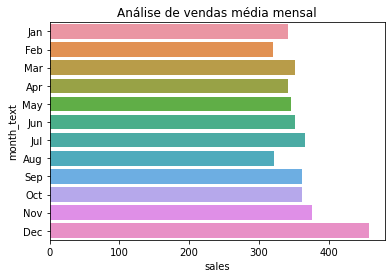

In [ ]:
sns.barplot(x = df_m_sa.sales, y = df_m_sa.month_text, data = df_m_sa).set_title("An√°lise de vendas m√©dia mensal")

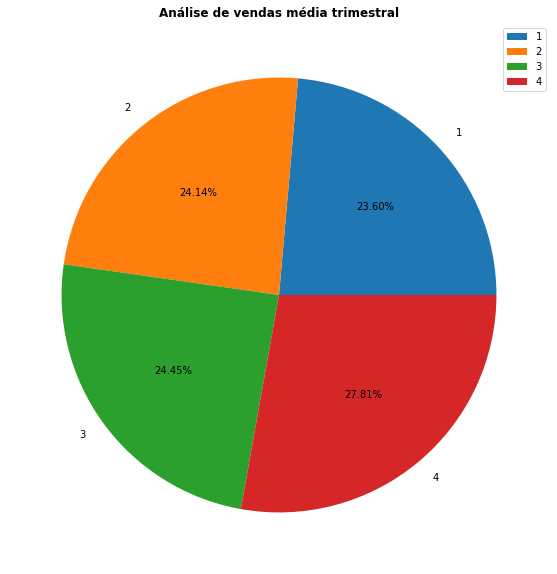

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(df_q_sa.sales, labels = df_q_sa.quarter, autopct='%1.2f%%')
plt.legend()
plt.title('An√°lise de vendas m√©dia trimestral', fontsize=12, fontweight='bold')
plt.show();

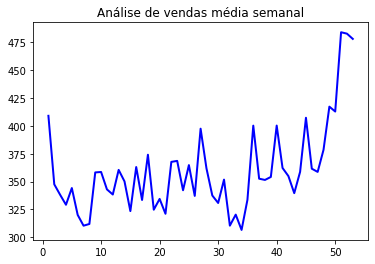

In [ ]:
plt.plot(df_w_sa.week, df_w_sa.sales, color='blue', linewidth=2)
plt.title('An√°lise de vendas m√©dia semanal');

As maiores vendas s√£o feitas no **√∫ltimo trimestre** do ano, seguido pelo terceiro. Aquele com menos vendas √© o primeiro.

In [ ]:
# data
df_dw_sa = df_data[:train.shape[0]].groupby('day_of_week').agg({"sales" : "mean"}).reset_index()
df_dw_sa.sales = round(df_dw_sa.sales, 2)

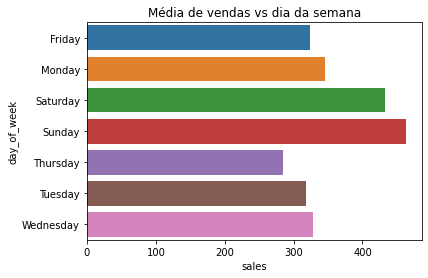

In [ ]:
sns.barplot(x = df_dw_sa.sales, y = df_dw_sa.day_of_week, data = df_dw_sa).set_title("M√©dia de vendas vs dia da semana");

Maiores vendas s√£o feitas no **fim de semana**. Surpreendentemente, as segundas-feiras s√£o o terceiro dia com mais vendas.

In [ ]:
df_train = df_data[:train.shape[0]][['state','sales','store','year']]

Text(0.5, 1.0, 'Estado vs Vendas da Loja A (por ano)')

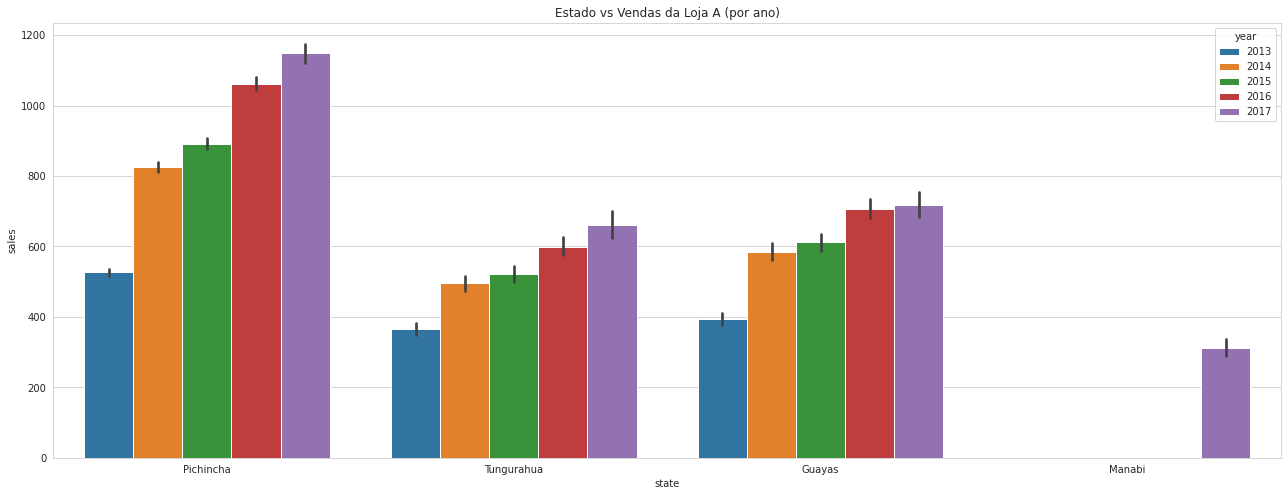

In [ ]:
fig = plt.figure(figsize=(22,8))
sns.set_style('whitegrid')
sns.barplot(x='state',y='sales',hue = 'year', data=df_train[df_train['store'] == 'A'])
plt.title("Estado vs Vendas da Loja A (por ano)");

As maiores vendas s√£o feitas no estado de **Pichincha**. As vendas aumentaram durante o per√≠odo registrado em todos os estados, exceto Manabi, onde a Loja A √© nova em 2017.

# Componentes da S√©rie Temporal (Tend√™ncia, Sazonalidade, Decomposi√ß√£o)

Se assumirmos uma **decomposi√ß√£o aditiva**, ent√£o podemos escrever $y_{t} = S_{t} + T_{t} + R_{t}$, onde $y_{t}$ √© os dados, $S_{t}$ √© o componente sazonal, $T_{t}$ √© o componente do ciclo de tend√™ncia e $R_{t}$ √© o componente residual, tudo no tempo ùë°. Al√©m disso, para uma **decomposi√ß√£o multiplicativa**, temos $y_{t} = S_{t} * T_{t} * R_{t}$.

A decomposi√ß√£o aditiva √© a mais adequada se a magnitude das flutua√ß√µes sazonais, ou a varia√ß√£o em torno do ciclo de tend√™ncia, n√£o varia com o n√≠vel da s√©rie temporal. 

Quando a varia√ß√£o no padr√£o sazonal, ou a varia√ß√£o em torno do ciclo de tend√™ncia, parece ser proporcional ao n√≠vel da s√©rie temporal, ent√£o uma decomposi√ß√£o multiplicativa √© mais apropriada. 

Decomposi√ß√µes multiplicativas s√£o comuns com s√©ries temporais econ√¥micas.

### Tend√™ncia

O componente de tend√™ncia de uma s√©rie temporal representa uma mudan√ßa persistente e de longo prazo na m√©dia da s√©rie. A tend√™ncia √© a parte mais lenta de uma s√©rie, a parte que representa a maior escala de tempo de import√¢ncia. Em uma s√©rie temporal de vendas de produtos, uma tend√™ncia crescente pode ser o efeito de uma expans√£o do mercado, √† medida que mais pessoas tomam conhecimento do produto ano a ano.

In [ ]:
# Gr√°fico de m√©dia m√≥vel
sales = df_data[:train.shape[0]].groupby('date').agg({"sales" : "mean"}).reset_index()
sales.set_index('date',inplace=True)
moving_average = sales.rolling(
    window=365,       
    center=True,      
    min_periods=183,  
).mean()              
moving_average['date'] = sales.index

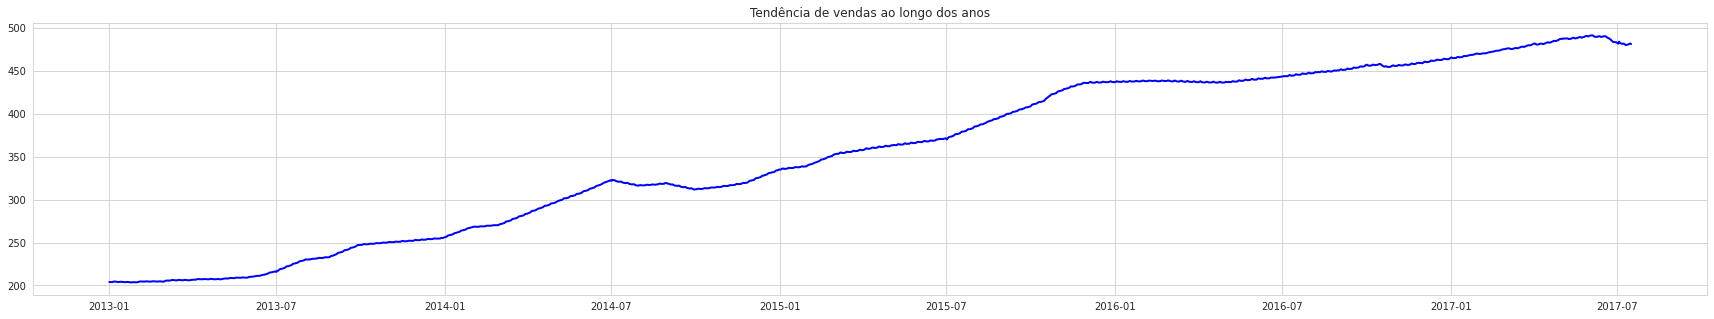

In [ ]:
plt.figure(figsize = (30,5))
plt.plot(moving_average.date, moving_average.sales, color='blue', linewidth=2)
plt.title('Tend√™ncia de vendas ao longo dos anos')
plt.show();

Para calcular uma m√©dia m√≥vel de uma s√©rie temporal, calculamos a m√©dia dos valores dentro de uma janela deslizante de uma largura definida. Cada ponto no gr√°fico representa a m√©dia de todos os valores da s√©rie que se enquadram na janela de cada lado. A ideia foi suavizar quaisquer flutua√ß√µes de curto prazo na s√©rie para que apenas as mudan√ßas de longo prazo permane√ßam.

As vendas t√™m uma tend√™ncia de **aumento** constante durante os anos registrados.

### Sazonalidade

Dizemos que uma s√©rie temporal exibe sazonalidade sempre que h√° uma mudan√ßa regular e peri√≥dica na m√©dia da s√©rie. As mudan√ßas sazonais geralmente seguem o rel√≥gio e o calend√°rio - repeti√ß√µes ao longo de um dia, uma semana ou um ano s√£o comuns. 

A sazonalidade √© muitas vezes impulsionada pelos ciclos do mundo natural ao longo de dias e anos ou por conven√ß√µes de comportamento social em torno de datas e horas (feriados e datas comemorativas).

In [ ]:
store_sales = pd.read_csv(
    '/content/drive/MyDrive/store-sales-time-series-forecasting/train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    }, parse_dates=['date'])
store_sales.date = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
average_sales = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    #.loc['2017']
)

In [ ]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

Text(0.5, 1.0, 'Plot Sazonal (ano/diadoano)')

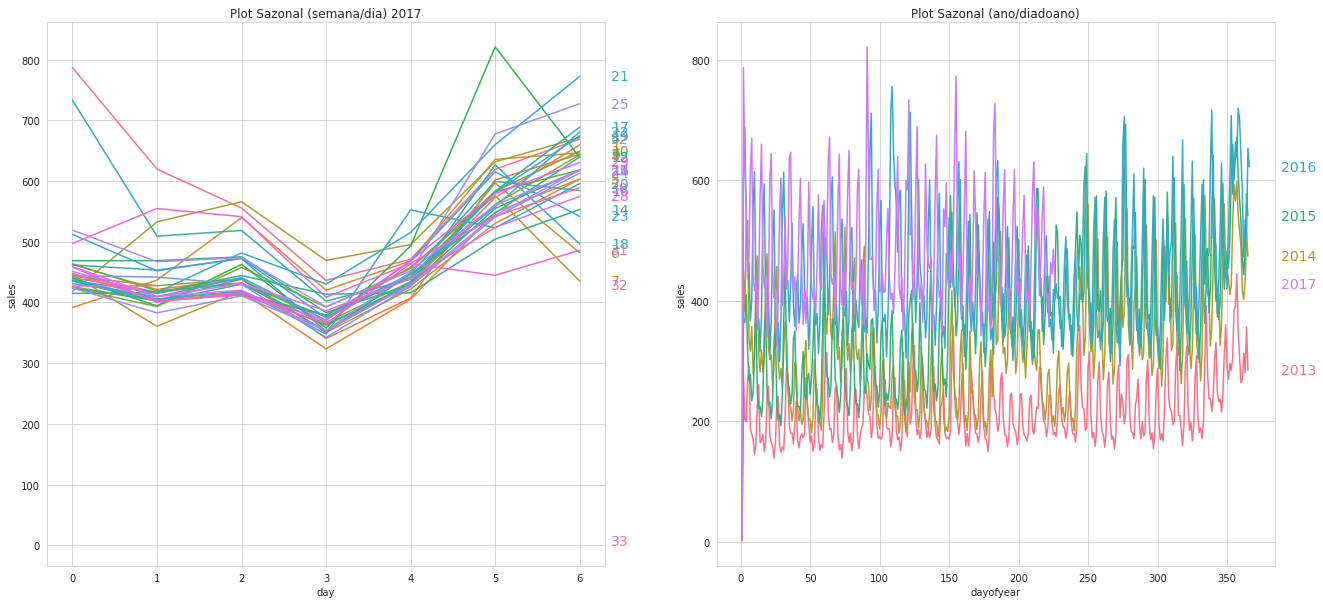

In [ ]:
X = average_sales.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
X['year'] = X.index.year
X['dayofyear'] = X.index.dayofyear


fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(22, 10))
seasonal_plot(X.loc['2017'], y='sales', period="week", freq="day", ax=ax0)
ax0.set_title('Plot Sazonal (semana/dia) 2017')
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax1);
ax1.set_title('Plot Sazonal (ano/diadoano)')

O gr√°fico sazonal sugerem uma forte sazonalidade semanal e uma fraca sazonalidade anual. De fato, as notas do conjunto de dados de vendas nas lojas dizem que os sal√°rios no setor p√∫blico s√£o pagos quinzenalmente, no 15¬∫ e √∫ltimo dia do m√™s ‚Äì uma poss√≠vel origem para essas temporadas.

### Decomposi√ß√£o

Combinamos todos os recursos das s√©ries temporais acima em um √∫nico gr√°fico.

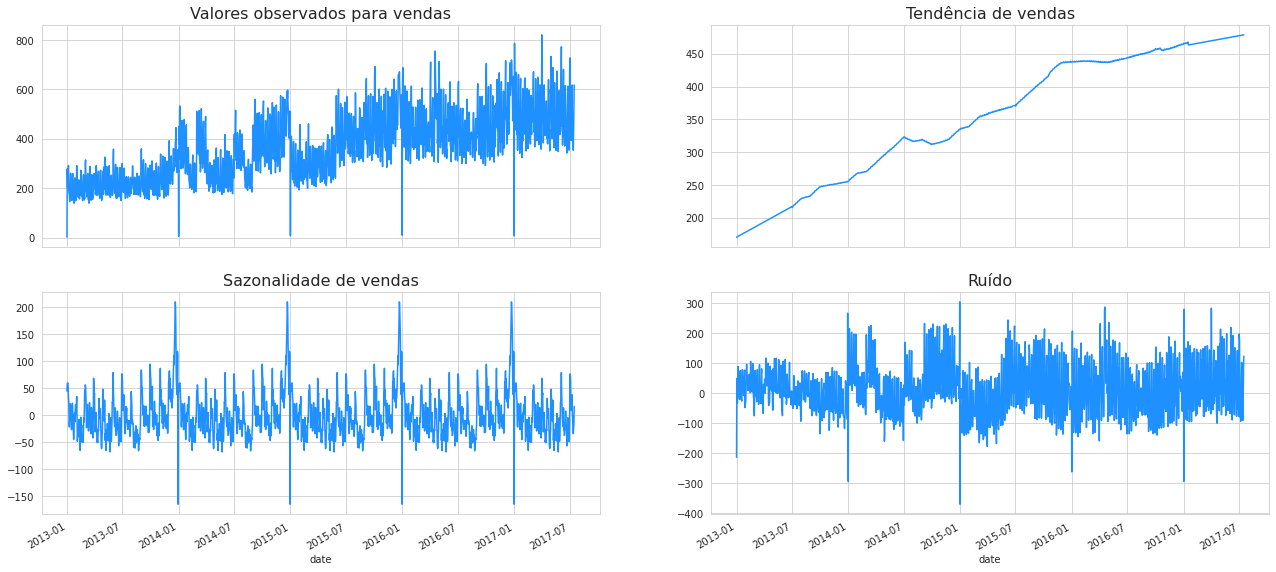

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(sales['sales'], period=365, model='additive', extrapolate_trend='freq')
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(22,10))
ax[0,0].set_title('Valores observados para vendas', fontsize=16)
decomp.observed.plot(ax = ax[0,0], legend=False, color='dodgerblue')

ax[0,1].set_title('Tend√™ncia de vendas', fontsize=16)
decomp.trend.plot(ax = ax[0,1],legend=False, color='dodgerblue')

ax[1,0].set_title('Sazonalidade de vendas', fontsize=16)
decomp.seasonal.plot(ax = ax[1,0],legend=False, color='dodgerblue')

ax[1,1].set_title('Ru√≠do', fontsize=16)
decomp.resid.plot(ax = ax[1,1],legend=False, color='dodgerblue')

Podemos ver que o componente sazonal muda lentamente ao longo do tempo. Mas isso n√£o significa que anos antes e ap√≥s n√£o ter√£o padr√µes sazonais diferentes.

O componente residual mostrado no painel inferior "Ru√≠do" √© o que sobra quando os componentes sazonais e de ciclo de tend√™ncia s√£o subtra√≠dos dos dados.

### Estacionaridade

Uma S√©rie Temporal estacion√°ria √© aquela cujas propriedades n√£o dependem do tempo em que a s√©rie √© observada. Assim, s√©ries temporais com tend√™ncias, ou com sazonalidade, n√£o s√£o estacion√°rias. Uma s√©rie temporal com comportamento c√≠clico (mas sem tend√™ncia ou sazonalidade) √© estacion√°ria.

A estacionaridade √© importante, pois as s√©ries n√£o estacion√°rias que dependem do tempo t√™m muitos par√¢metros a serem considerados ao modelar a s√©rie temporal. O m√©todo diff() pode facilmente converter uma s√©rie n√£o estacion√°ria em uma s√©rie estacion√°ria.

In [ ]:
# Checando a estacionaridade
def adf_test(series, title=''):
    print('Teste Dickey-Fuller Aumentado: {}'.format(title))
    # .dropna() lida com dados diferenciados
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['Estat√≠stica de teste ADF','p-value','# atrasos usados','# observa√ß√µes']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['valor cr√≠tico ({})'.format(key)]=val
        
    # .to_string() remove a linha "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("Forte evid√™ncia contra a hip√≥tese nula")
        print("Rejeitar a hip√≥tese nula")
        print("Os dados n√£o t√™m raiz unit√°ria e s√£o estacion√°rios")
    else:
        print("Evid√™ncia fraca contra a hip√≥tese nula")
        print("Falha ao rejeitar a hip√≥tese nula")
        print("Os dados t√™m uma raiz unit√°ria e n√£o s√£o estacion√°rios")

In [ ]:
# Agregando a s√©rie temporal a um √≠ndice escalonado mensalmente
y = df_data[['date','sales']].copy()
y.set_index('date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
        
adf_test(y['sales'],title='') 

Teste Dickey-Fuller Aumentado: 
Estat√≠stica de teste ADF    -1.581928
p-value                      0.492665
# atrasos usados             1.000000
# observa√ß√µes               54.000000
valor cr√≠tico (1%)          -3.557709
valor cr√≠tico (5%)          -2.916770
valor cr√≠tico (10%)         -2.596222
Evid√™ncia fraca contra a hip√≥tese nula
Falha ao rejeitar a hip√≥tese nula
Os dados t√™m uma raiz unit√°ria e n√£o s√£o estacion√°rios


Se os dados n√£o s√£o estacion√°rios, mas queremos usar um modelo como o ARIMA (que requer essa caracter√≠stica), os dados devem ser transformados. Vamos transformar a tend√™ncia de vendas de n√£o estacionaridade para estacionaridade usando o m√©todo diff:

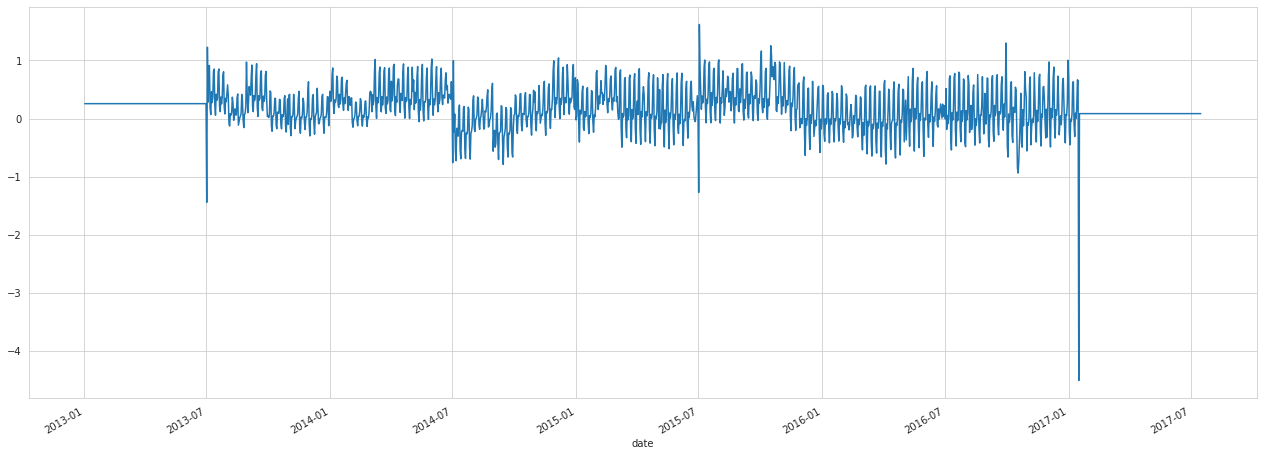

In [ ]:
fig = plt.figure(figsize=(22,8))
decomp.trend.diff().plot()

# Transforma√ß√£o dos atributos

### Rotulando atributos n√£o num√©ricos usando LabelEncoder. 

Vamos converter recursos n√£o num√©ricos em tipo num√©rico com LabelEncoder, que basicamente rotula as classes de 0 a n. Esse processo √© necess√°rio para que os modelos aprendam com esses recursos.

In [ ]:
non_numerical_cols =  [col for col in df_data.columns if df_data[col].dtype == 'object']
for feature in non_numerical_cols:        
    df_data[feature] = LabelEncoder().fit_transform(df_data[feature])
df_data.head().style.set_properties(subset=non_numerical_cols, **{'background-color': '#F1C40F'})

In [ ]:
df_data.dtypes

date            datetime64[ns]
family                   int64
id                       int64
onpromotion              int64
sales                  float64
store_nbr                int64
city                     int64
state                    int64
store                    int64
cluster                  int64
dcoilwtico             float64
transactions           float64
holiday                  int64
locale                   int64
locale_name              int64
description              int64
transferred               bool
year                     int64
month                    int64
week                    UInt32
quarter                  int64
day_of_week              int64
dtype: object

### One Hot Encoding

Para finalizar, vamos a um recurso n√£o-ordinal One Hot Enconding. Todos os recursos rotulados acima s√£o recursos n√£o-ordinais. Portanto, mudamos para One Hot Enconding aqueles que t√™m uma baixa cardinalidade.

In [ ]:
low_card_cols = [col for col in non_numerical_cols if len(df_data[col].unique()) < 15]

In [ ]:
encoded_features = []

for feature in low_card_cols:
    encoded_feat = OneHotEncoder().fit_transform(df_data[feature].values.reshape(-1, 1)).toarray()
    n = df_data[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_data.index
    encoded_features.append(encoded_df)

df_data = pd.concat([df_data, *encoded_features[:9]], axis=1)

In [ ]:
df_data.head().style.set_properties(subset=low_card_cols, **{'background-color': '#F1C40F'})

In [ ]:
df_data = df_data.drop(low_card_cols,axis=1)

# Modelagem

### Cross Validation

Antes de tudo, vimos como funciona a t√©cnica de valida√ß√£o cruzada na An√°lise de S√©rie Temporal.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
N_SPLITS = 3

X = df_data['date']
y = df_data['sales']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

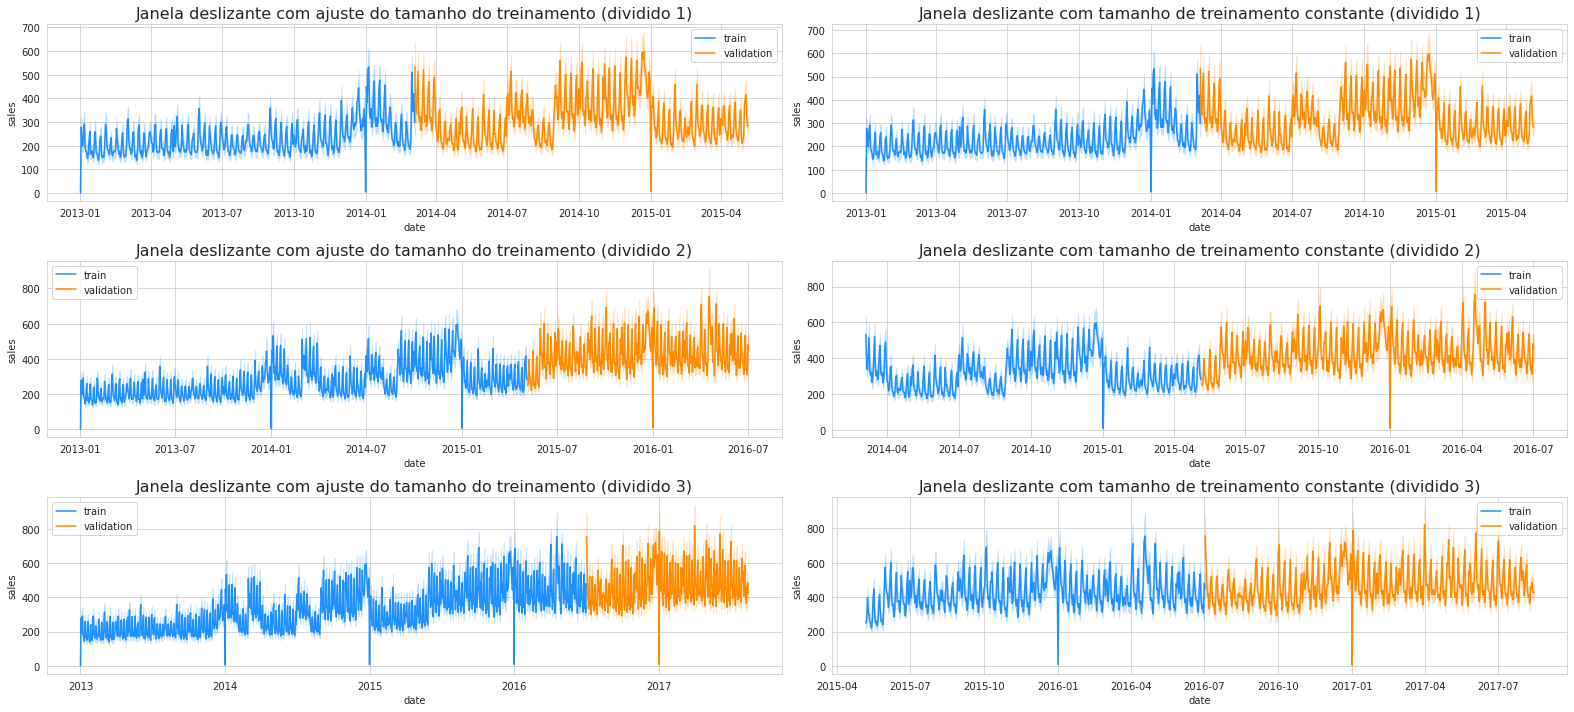

In [ ]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(22, 10))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Janela deslizante com ajuste do tamanho do treinamento (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Janela deslizante com tamanho de treinamento constante (Split {i+1})", fontsize=16)

plt.tight_layout()
plt.show()

### An√°lise de S√©rie Temporal Univariada

S√©rie temporal univariada: apenas uma vari√°vel est√° variando ao longo do tempo. 

**Prophet**:

O modelo que utilizamos √© o Facebook Prophet. Prophet, ou ‚ÄúFacebook Prophet‚Äù, √© uma biblioteca de c√≥digo aberto para previs√£o de s√©ries temporais univariadas (uma vari√°vel) desenvolvida pelo Facebook. O Prophet implementa o que eles chamam de modelo de previs√£o de s√©rie temporal aditiva, e a implementa√ß√£o suporta tend√™ncias, sazonalidade e feriados. Nesse caso, vamos us√°-lo para mostrar as vendas m√©dias por dia (√© uma s√©rie temporal univariada).

In [ ]:
# Instalando a biblioteca do modelo
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67.3 MB 97 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638663 sha256=287414ec166c60b0081a825abc51ea21adf3ea4a0aca2a527d4542f12876c120
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7

In [ ]:
# Download da Biblioteca
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet

train = df_data[df_data['date']<= datetime.datetime(2017,8,15)][['date','sales']].groupby('date').mean().reset_index('date')
train.columns = ['ds', 'y']
x_valid = pd.DataFrame(df_data[df_data['date']>= datetime.datetime(2017,8,16)]['date'])
x_valid.columns = ['ds']

# Treinando o modelo
model = Prophet(daily_seasonality=True)
model.fit(train)
y_pred = model.predict(x_valid)

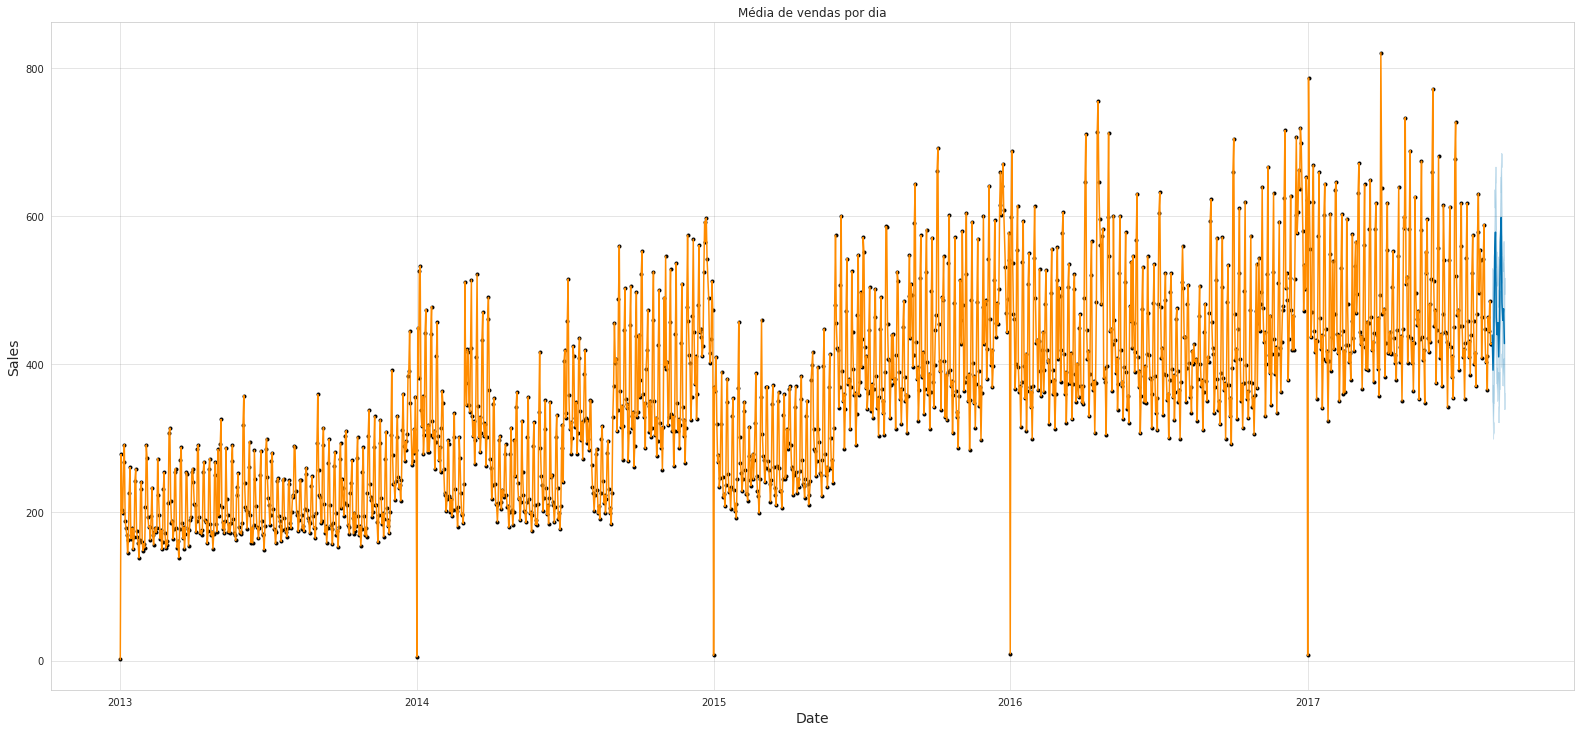

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(22)

model.plot(y_pred, ax=ax)
sns.lineplot(x=train['ds'], y=train['y'], ax=ax, color='darkorange') 

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)
ax.set_title('M√©dia de vendas por dia')

plt.show();

### An√°lise de S√©rie Temporal Multivariada

Por fim, vamos analisar a previs√£o multivariada da S√©rie Temporal.

S√©ries temporais multivariadas: V√°rias vari√°veis est√£o variando ao longo do tempo.

In [ ]:
train_multivariate = df_data[df_data['date']<= datetime.datetime(2017,8,15)][['date','sales','dcoilwtico']].groupby('date').mean().reset_index('date')
train_multivariate.columns = ['ds', 'y','dcoilwtico']
x_valid = pd.DataFrame(df_data[df_data['date']>= datetime.datetime(2017,8,16)][['date','dcoilwtico']])
x_valid.columns = ['ds','dcoilwtico']

# Treinando o modelo
model_multivariate = Prophet(daily_seasonality=True)
model_multivariate.add_regressor('dcoilwtico')

model_multivariate.fit(train_multivariate)
y_pred_multivariate = model_multivariate.predict(x_valid)

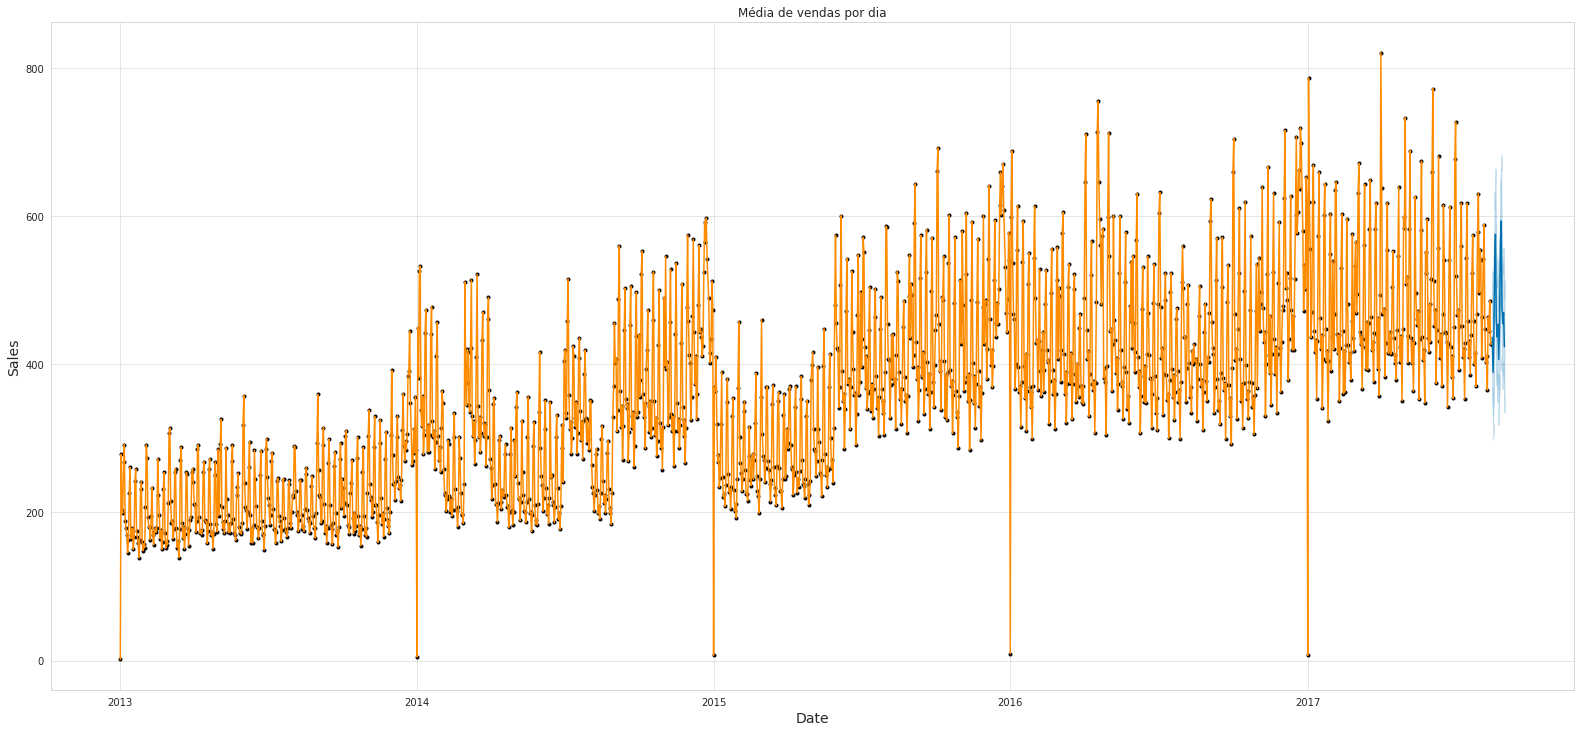

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(22)

model.plot(y_pred_multivariate, ax=ax)
sns.lineplot(x=train_multivariate['ds'], y=train_multivariate['y'], ax=ax, color='darkorange')

#ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)
ax.set_title('M√©dia de vendas por dia')

plt.show();